In [1]:
import pandas as pd 
import numpy as np 
import pyodbc 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

In [2]:
conn_str = (
    'DRIVER={SQL SERVER};'
    'SERVER=DESKTOP-TTMOTHN\SQLEXPRESS;'
    'DATABASE=TestDB;'
    'Trusted_Connection=yes;'
)


In [3]:
conn = pyodbc.connect(conn_str)

In [4]:
query = "SELECT * FROM shopping_trends"
df = pd.read_sql(query, conn)

df 

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_USD         0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

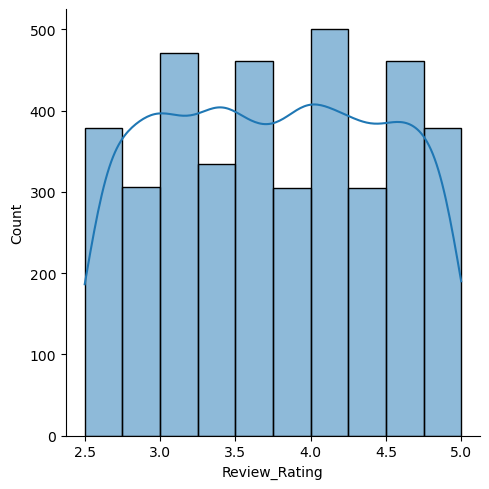

In [154]:
sns.displot(data=df, x="Review_Rating", kde=True,bins=10)
# مستوى تقييم العملاء 

In [50]:
grouped_df = df.groupby(["Item_Purchased", "Gender"]).size().reset_index(name="Count")

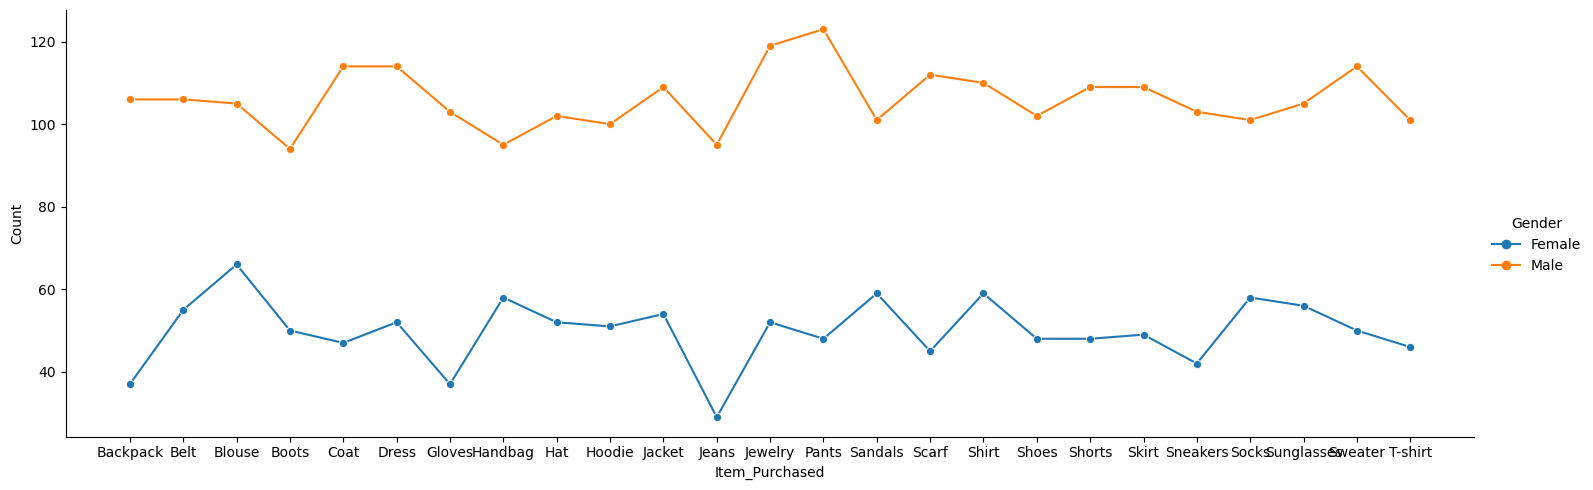

In [58]:
# sns.displot(data=df, kind="ecdf", x="Item_Purchased", hue="Gender", rug=True)
sns.relplot(data=grouped_df, x="Item_Purchased",y='Count' ,hue="Gender", kind="line", marker="o", aspect=3 )
#اكثر منتجات مبيعا عند الرجال والنساء 
# استنتاج : ان اكثر المنتجات مبيعا عند النساء هو (pants)
# (blouse)استنتاج : ان اكثر المنتجات مبيعا عند الرجاب هو

In [60]:
grouped_df_Age = df.groupby(["Age", "Gender"]).size().reset_index(name="Count")

<Axes: xlabel='Age', ylabel='Count'>

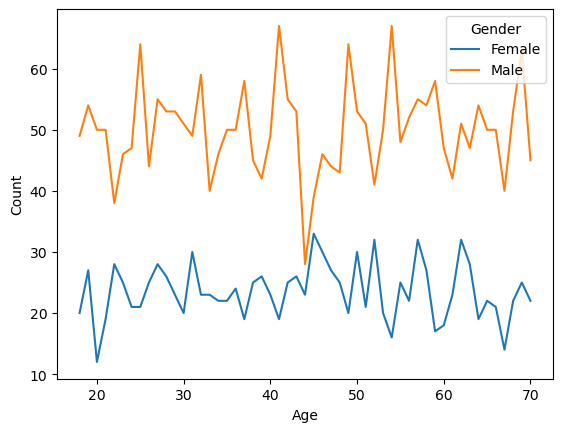

In [160]:
sns.lineplot(data = grouped_df_Age, x="Age", y='Count',hue="Gender",)

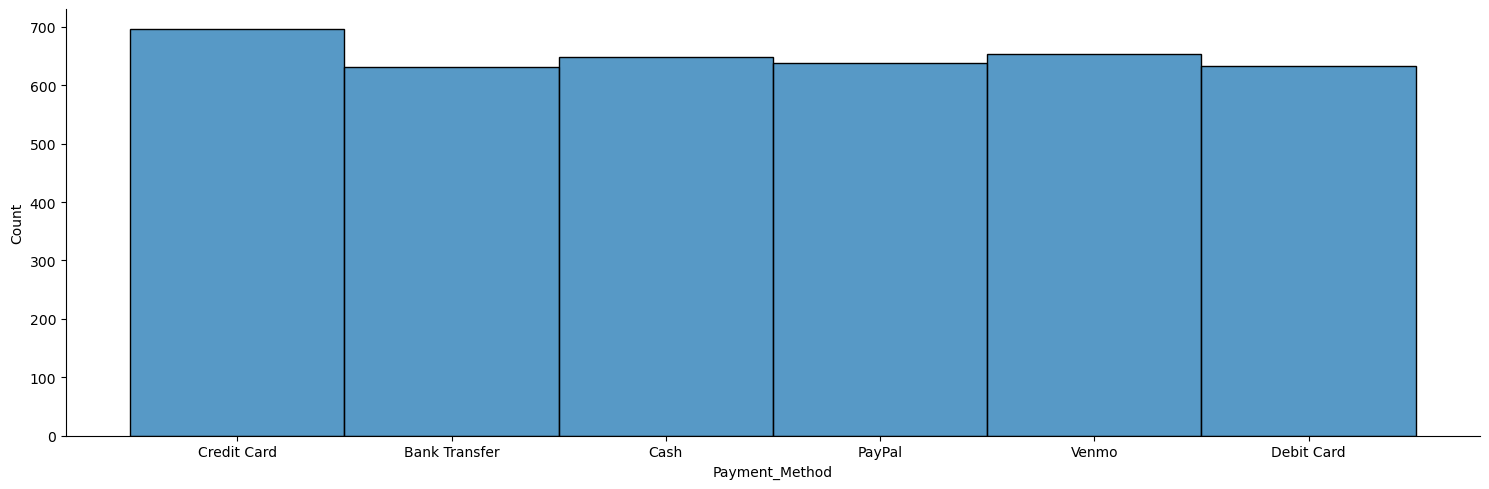

In [97]:
sns.displot(data=df, x="Payment_Method" , aspect=3  )
# بستفاد من المعلومات دي ان طرق الدفع المباشرة قليلة , وممكن فريق التسويق ينشط الدفع بطرق الاقل تكلفة و فورية 

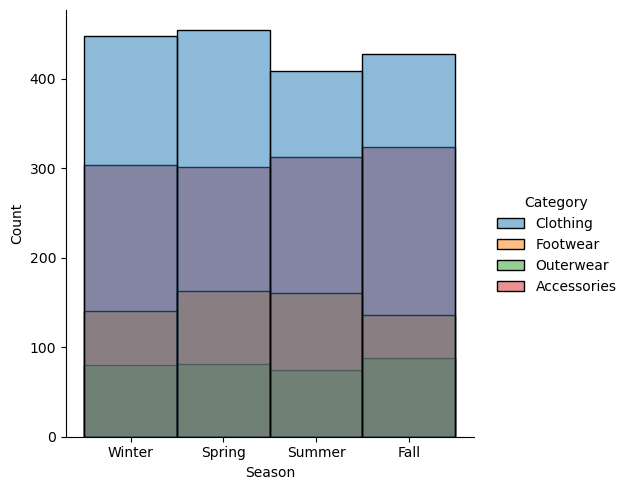

In [109]:
sns.displot(data=df, x="Season", hue="Category")

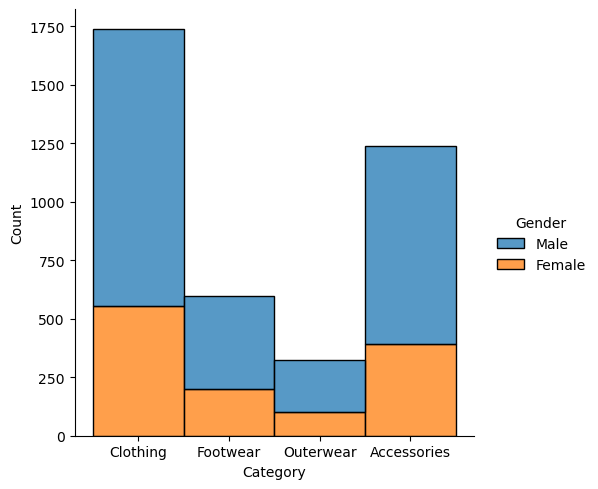

In [113]:
sns.displot(data=df, x="Category", hue="Gender",multiple="stack")

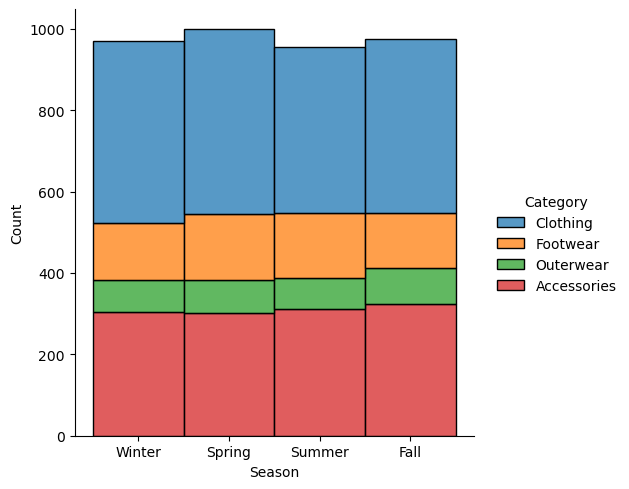

In [117]:
sns.displot(data=df, x="Season", hue="Category",multiple="stack")
#most catogory sale on sesson

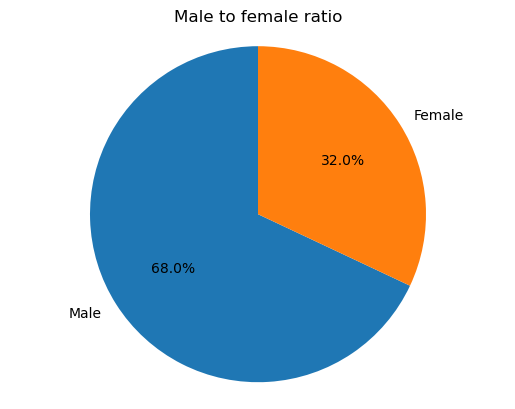

In [138]:
counts = df["Gender"].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Male to female ratio")
plt.show()

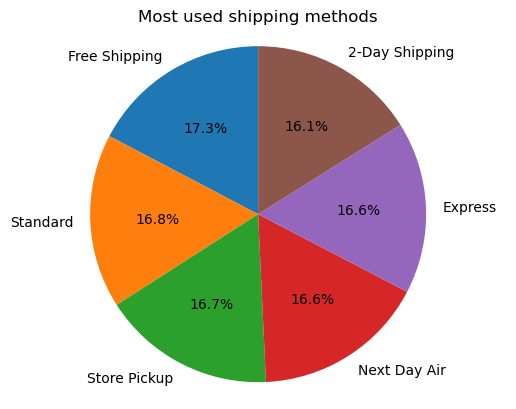

In [140]:
counts = df["Shipping_Type"].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Most used shipping methods")
plt.show()